# Elementi di algebra lineare {#sec-linear-algebra}

**Prerequisiti**

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [26]:
# Importazioni dalla libreria standard
import os

# Importazioni di librerie di terze parti
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import scipy.stats as stats
from cmdstanpy import CmdStanModel
import statsmodels.api as sm
import pingouin as pg

# Configurazione
seed = sum(map(ord, "linear_algebra"))  # Genera un seme basato sulla somma dei valori ASCII della stringa "linear_algebra"
rng = np.random.default_rng(seed=seed)  # Crea un generatore di numeri casuali con il seme specificato
sns.set_theme(palette="colorblind")  # Imposta il tema di Seaborn per grafici accessibili ai daltonici
az.style.use("arviz-darkgrid")  # Imposta lo stile dei grafici di ArviZ
%config InlineBackend.figure_format = "retina"  # Migliora la risoluzione dei grafici inline

# Definizione delle directory
home_directory = os.path.expanduser("~")  # Ottiene la directory home dell'utente
project_directory = f"{home_directory}/_repositories/psicometria"  # Definisce la directory del progetto

# Stampa la directory del progetto per verificarla
print(f"Directory del progetto: {project_directory}")

Directory del progetto: /Users/corradocaudek/_repositories/psicometria


## Introduzione 

Questo capitolo presenta alcune nozioni di base dell'algebra lineare, una branca della matematica essenziale per la comprensione e l'analisi dei modelli di regressione lineare. 

## Rappresentazione dei Vettori

Nell'algebra lineare, un vettore, che rappresenta una lista ordinata di scalari, è solitamente indicato con una lettera minuscola in grassetto, come $\mathbf{v}$. Gli elementi di un vettore sono generalmente indicati con un indice, ad esempio $\mathbf{v}_1$ si riferisce al primo elemento del vettore $\mathbf{v}$.

Un vettore $\mathbf{v}$ di $n$ elementi può essere rappresentato sia come una colonna che come una riga, a seconda della convenzione scelta. Ad esempio, un vettore colonna di $n$ elementi è scritto come:

$$
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix},
$$

mentre un vettore riga appare come:

$$
\mathbf{v} = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}.
$$

Questa notazione consente di visualizzare chiaramente i singoli elementi del vettore e di riferirsi a ciascuno di essi in modo specifico.

Una lista di $n$ scalari organizzata in un vettore $\mathbf{v}$ è chiamata "dimensione" del vettore. Formalmente, si esprime come $\mathbf{v} \in \mathbb{R}^n$, indicando che il vettore $\mathbf{v}$ appartiene all'insieme di tutti i vettori reali di dimensione $n$.


## Visualizzazione Geometrica dei Vettori

I vettori possono essere rappresentati come frecce in uno spazio $n$-dimensionale, con l'origine come punto di partenza e la punta della freccia che corrisponde alle coordinate specificate dal vettore. La norma $L_2$ (o lunghezza) di un vettore, denotata come $\|\mathbf{v}\|$, rappresenta la distanza euclidea dall'origine alla punta del vettore.

Per un vettore $\mathbf{v} = [v_1, v_2, \ldots, v_n]$, la norma è definita come:

$$
\|\mathbf{v}\| = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}.
$$

### Esempio Numerico

Consideriamo un vettore in uno spazio bidimensionale, ad esempio $\mathbf{v} = [3, 4]$. Geometricamente, questo vettore parte dall'origine $(0, 0)$ e termina nel punto $(3, 4)$ del piano cartesiano.

Per calcolare la norma $L_2$ di questo vettore, applichiamo la formula:

$$
\|\mathbf{v}\| = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5.
$$

Quindi, la norma del vettore $\mathbf{v} = [3, 4]$ è 5, che rappresenta la lunghezza della freccia dal punto di origine $(0, 0)$ al punto $(3, 4)$ nello spazio bidimensionale.

### Rappresentazione Geometrica

```
y
^
|       * (3, 4)
|      /
|     /
|    /
|   /
|  /
| / 
|/____________> x
(0, 0)
```

In questo diagramma, il punto `*` rappresenta la fine del vettore $\mathbf{v}$ e la linea inclinata mostra il vettore stesso che parte dall'origine. L'altezza della linea fino al punto `(3, 4)` rappresenta visivamente la norma del vettore, che è la distanza di 5 unità dall'origine.

Questo esempio illustra chiaramente la relazione tra la rappresentazione numerica di un vettore e la sua interpretazione geometrica, facilitando la comprensione della lunghezza del vettore e della sua direzione nello spazio bidimensionale.

Sebbene noi siamo principalmente limitati a ragionare su spazi bidimensionali (2D) e tridimensionali (3D), i dati che raccogliamo spesso risiedono in spazi di dimensioni superiori. L'algebra lineare permette di ragionare e sviluppare intuizioni su vettori e spazi di dimensioni molto più elevate, superando i limiti della visualizzazione diretta.

## Operazioni di Base sui Vettori

### 1. Moltiplicazione di un Vettore per uno Scalare

La moltiplicazione di un vettore per uno scalare produce un nuovo vettore. Questa operazione può essere interpretata come una "scalatura" del vettore nello spazio: il vettore risultante mantiene la stessa direzione dell'originale, ma la sua lunghezza viene modificata in base allo scalare.

Se $\mathbf{v} = [v_1, v_2, \ldots, v_n]$ è un vettore e $c$ è uno scalare, la moltiplicazione del vettore per lo scalare è data da:

$$
c\mathbf{v} = [cv_1, cv_2, \ldots, cv_n]
$$

### 2. Addizione di Vettori

È possibile sommare due vettori della stessa dimensione. La somma vettoriale si ottiene sommando gli elementi corrispondenti di ciascun vettore.

Se $\mathbf{u} = [u_1, u_2, \ldots, u_n]$ e $\mathbf{v} = [v_1, v_2, \ldots, v_n]$ sono due vettori di dimensione $n$, la loro somma è:

$$
\mathbf{u} + \mathbf{v} = [u_1 + v_1, u_2 + v_2, \ldots, u_n + v_n]
$$

### 3. Prodotto Scalare (o Prodotto Interno)

Il prodotto scalare tra due vettori della stessa dimensione è uno scalare che fornisce informazioni sull'angolo tra i vettori nello spazio. Formalmente, il prodotto scalare di $\mathbf{u} = [u_1, u_2, \ldots, u_n]$ e $\mathbf{v} = [v_1, v_2, \ldots, v_n]$ è definito come:

$$
\mathbf{u} \cdot \mathbf{v} = u_1v_1 + u_2v_2 + \cdots + u_nv_n
$$

Questo prodotto scalare può anche essere espresso in termini dell'angolo $\theta$ tra i vettori:

$$
\mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\| \|\mathbf{v}\| \cos(\theta)
$$

Se due vettori sono ortogonali, ovvero formano un angolo di $90^\circ$ tra loro, il loro prodotto scalare è zero: $\mathbf{u} \cdot \mathbf{v} = 0$.

### 4. Prodotto Scalare di un Vettore con Se Stesso

Il prodotto scalare di un vettore con se stesso fornisce il quadrato della sua lunghezza. Se $\mathbf{v} = [v_1, v_2, \ldots, v_n]$, allora:

$$
\mathbf{v} \cdot \mathbf{v} = v_1^2 + v_2^2 + \cdots + v_n^2 = \|\mathbf{v}\|^2
$$

Queste operazioni di base sui vettori sono fondamentali per molte applicazioni in matematica, fisica, informatica e altre scienze, fornendo una struttura potente per analizzare e risolvere problemi in spazi multidimensionali.

## Vettori in NumPy

**NumPy** è la libreria di Python più usata per manipolare vettori e matrici.

Usiamo NumPy per creare  un vettore con tre elementi: 1, 2 e 3:

In [3]:
v = np.array([1, 2, 3])
print(v)

[1 2 3]


In questo esempio, `v` è un array NumPy che rappresenta un vettore con tre elementi: 1, 2 e 3.

Per fare il prodotto tra un vettore e uno scalare, puoi semplicemente moltiplicare l'array NumPy per uno scalare. Questa operazione moltiplica ogni elemento del vettore per lo scalare:

In [4]:
a = 5

# Prodotto vettore-scalare
va = v * a
print(va)

[ 5 10 15]


Questo moltiplicherà ogni elemento del `vettore` per `5`, dando come risultato `[5, 10, 15]`.

Il prodotto interno (o prodotto scalare) tra due vettori è una somma dei prodotti dei loro elementi corrispondenti. In NumPy, si può calcolare usando la funzione `np.dot()` oppure l'operatore `@`:

In [5]:
v2 = np.array([4, 5, 6])

# Prodotto interno usando np.dot()
prodotto_interno = np.dot(v, v2)
print(prodotto_interno)

# Prodotto interno usando l'operatore @
prodotto_interno2 = v @ v2
print(prodotto_interno2)

32
32


Entrambi i metodi daranno il risultato `32`, dato che il prodotto interno è calcolato come $1*4 + 2*5 + 3*6 = 32$.

Il prodotto esterno tra due vettori produce una matrice dove ogni elemento è il prodotto degli elementi dei due vettori. In NumPy, si utilizza la funzione `np.outer()`:

In [6]:
# Prodotto esterno
prodotto_esterno = np.outer(v, v2)
print(prodotto_esterno)

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


Ogni elemento di questa matrice è il risultato della moltiplicazione degli elementi corrispondenti dei due vettori.

## Matrici

Una matrice è una struttura matematica bidimensionale costituita da elementi disposti in righe e colonne. Formalmente, una matrice $\mathbf{A}$ di dimensioni $m \times n$ (si legge "m per n") è un array rettangolare di numeri reali o complessi, denotato come:

$$ \mathbf{A} = (a_{ij})_{m \times n} = \begin{bmatrix} 
a_{11} & a_{12} & \cdots & a_{1n} \\ 
a_{21} & a_{22} & \cdots & a_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix} $$

dove $a_{ij}$ rappresenta l'elemento nella $i$-esima riga e $j$-esima colonna della matrice.

Le matrici sono comunemente indicate con lettere maiuscole in grassetto, come $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, etc. Una matrice con $m$ righe e $n$ colonne si dice di ordine $m \times n$.

In molte matrici di dati, ogni elemento $a_{ij}$ è uno scalare che rappresenta il valore della $j$-esima variabile del $i$-esimo campione. Formalmente, possiamo indicare $\mathbf{A} \in \mathbb{R}^{m \times n}$, il che significa che la matrice $\mathbf{A}$ ha $m$ righe e $n$ colonne. Si dice comunemente che la "dimensione" di $\mathbf{A}$ è $m \times n$.

### Matrici come Collezioni di Vettori Colonna

Le matrici possono essere interpretate come collezioni di vettori colonna. Ad esempio, una matrice di dati può essere rappresentata come:

$$
\mathbf{A} = \begin{bmatrix} \mathbf{a}_1 & \mathbf{a}_2 & \cdots & \mathbf{a}_n \end{bmatrix}
$$

In questo caso, $\mathbf{A}$ è composta da una sequenza di $n$ vettori colonna $\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_n$, ciascuno dei quali è un vettore di dimensione $m$. Più precisamente, ogni vettore colonna $\mathbf{a}_j$ rappresenta i dati di tutti i campioni per la $j$-esima variabile o feature.

### Matrici come Collezioni di Vettori Riga

In alternativa, una matrice può essere vista come una collezione di vettori riga. In questo contesto, ogni riga di $\mathbf{A}$ rappresenta tutte le variabili misurate per un dato campione:

$$
\mathbf{A} = \begin{bmatrix} 
\mathbf{a}_1^T \\ 
\mathbf{a}_2^T \\ 
\vdots \\ 
\mathbf{a}_m^T 
\end{bmatrix}
$$

Qui, la matrice $\mathbf{A}$ è composta da $m$ vettori riga, denotati come $\mathbf{a}_i^T$. Ognuno di questi vettori riga $\mathbf{a}_i^T$ è di dimensione $n$, indicando che ciascun campione ha $n$ variabili o feature associate. 

### Trasposta di una Matrice

Il simbolo $T$ rappresenta la trasposta di una matrice. La trasposta di una matrice, denotata con un apice $T$ (es. $\mathbf{A}^T$), è un'operazione che trasforma ciascuna delle righe di $\mathbf{A}$ in colonne di $\mathbf{A}^T$. In altre parole, se $\mathbf{A}$ ha dimensione $m \times n$, allora $\mathbf{A}^T$ avrà dimensione $n \times m$:

$$
\mathbf{A}^T = \begin{bmatrix} 
a_{11} & a_{21} & \cdots & a_{m1} \\ 
a_{12} & a_{22} & \cdots & a_{m2} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{1n} & a_{2n} & \cdots & a_{mn} 
\end{bmatrix}
$$

Con la trasposta, le variabili misurate diventano colonne e i campioni diventano righe. Essenzialmente, i vettori riga sono le trasposte dei vettori colonna. Questo concetto è molto utile in algebra lineare, poiché permette di passare facilmente da una rappresentazione dei dati a un'altra.

In NumPy, una matrice è semplicemente un array bidimensionale. Per esempio, possiamo creare una matrice 3x4 utilizzando la funzione `np.array()` e fornendo una lista di liste (dove ogni lista interna rappresenta una riga della matrice).

Ecco come definire una matrice 3x4:

In [7]:
# Definizione della matrice 3x4
M = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12]
    ])
print(M)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In NumPy, puoi calcolare la trasposta di una matrice utilizzando l'attributo `.T` o la funzione `np.transpose()`.

In [8]:
# Calcolo della trasposta
trasposta = M.T

print("\nTrasposta della matrice:")
print(trasposta)


Trasposta della matrice:
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


## Moltiplicazione tra Matrici

La moltiplicazione tra matrici è un'operazione fondamentale nell'algebra lineare. Per poter moltiplicare due matrici, è necessario che siano **conformabili**, il che significa che il numero di colonne della prima matrice deve essere uguale al numero di righe della seconda matrice.

Se abbiamo una matrice $\mathbf{A}$ di dimensioni $m \times n$ (cioè, $m$ righe e $n$ colonne) e una matrice $\mathbf{B}$ di dimensioni $n \times p$ (cioè, $n$ righe e $p$ colonne), allora il prodotto delle due matrici $\mathbf{A} \mathbf{B}$ sarà una matrice $\mathbf{C}$ di dimensioni $m \times p$.

Il prodotto tra due matrici $\mathbf{A}$ e $\mathbf{B}$ si ottiene calcolando il prodotto interno tra le righe della prima matrice e le colonne della seconda matrice.

Per ciascun elemento $c_{ij}$ della matrice risultante $\mathbf{C}$, si esegue il seguente calcolo:

$$
c_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}.
$$

Questo significa che l'elemento $c_{ij}$ è il risultato del prodotto interno tra la $i$-esima riga della matrice $\mathbf{A}$ e la $j$-esima colonna della matrice $\mathbf{B}$.

La moltiplicazione di una matrice per un vettore è un caso particolare della moltiplicazione tra matrici, dove il vettore può essere visto come una matrice con una delle dimensioni uguale a 1.

Se $\mathbf{A}$ è una matrice $m \times n$ e $\mathbf{x}$ è un vettore di dimensione $n$ (cioè una matrice di dimensione $n \times 1$), allora il prodotto $\mathbf{A} \mathbf{x}$ è un vettore di dimensione $m$. Ogni elemento del vettore risultante è il prodotto interno tra una riga della matrice $\mathbf{A}$ e il vettore $\mathbf{x}$.

Consideriamo le seguenti matrici:

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}, \quad \mathbf{B} = \begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix}
$$

- $\mathbf{A}$ è una matrice $2 \times 3$.
- $\mathbf{B}$ è una matrice $3 \times 2$.

Il prodotto $\mathbf{A} \mathbf{B}$ è una matrice $2 \times 2$ calcolata come segue:

$$
\mathbf{C} = \mathbf{A} \mathbf{B} = \begin{bmatrix}
(1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11) & (1 \cdot 8 + 2 \cdot 10 + 3 \cdot 12) \\
(4 \cdot 7 + 5 \cdot 9 + 6 \cdot 11) & (4 \cdot 8 + 5 \cdot 10 + 6 \cdot 12)
\end{bmatrix}
$$

Calcolando ogni elemento:

$$
\mathbf{C} = \begin{bmatrix}
58 & 64 \\
139 & 154
\end{bmatrix}
$$

In questo esempio, ogni elemento della matrice risultante $\mathbf{C}$ è stato ottenuto calcolando il prodotto interno tra le righe di $\mathbf{A}$ e le colonne di $\mathbf{B}$.

Svolgiamo ora i calcoli usando NumPy.

In [10]:
# Definizione della matrice A (2x3)
A = np.array([[1, 2, 3], [4, 5, 6]])

# Definizione della matrice B (3x2)
B = np.array([[7, 8], [9, 10], [11, 12]])

# Calcolo del prodotto A * B usando np.dot()
prodotto_AB = np.dot(A, B)
print("\nProdotto A * B usando np.dot():")
print(prodotto_AB)

# Calcolo del prodotto A * B usando l'operatore @
prodotto_AB_operator = A @ B
print("\nProdotto A * B usando l'operatore @:")
print(prodotto_AB_operator)


Prodotto A * B usando np.dot():
[[ 58  64]
 [139 154]]

Prodotto A * B usando l'operatore @:
[[ 58  64]
 [139 154]]


### Matrice Identità e Matrice Inversa 

### Matrice Identità

La matrice identità, denotata come $\mathbf{I}_n$, è una matrice quadrata di dimensione $n \times n$ con tutti gli elementi sulla diagonale principale uguali a 1 e tutti gli altri elementi uguali a 0. Ad esempio, una matrice identità 3x3 è:

$$
\mathbf{I}_3 = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

In generale, una matrice identità di dimensione $n \times n$ è:

$$
\mathbf{I}_n = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}
$$

La matrice identità ha la proprietà fondamentale di essere l'elemento neutro per la moltiplicazione matriciale. Per qualsiasi matrice $\mathbf{A}$ di dimensioni $n \times n$:

$$
\mathbf{A} \mathbf{I}_n = \mathbf{A} \quad \text{e} \quad \mathbf{I}_n \mathbf{A} = \mathbf{A}.
$$

In NumPy, per creare la matrice identià usiamo il modulo `.eye()`. Per esempio:

In [11]:
I = np.eye(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Determinante di una Matrice

Il **determinante** è un numero associato a una matrice quadrata che fornisce informazioni essenziali sulle proprietà della matrice stessa. È uno scalare che può indicare se una matrice è invertibile, se un sistema di equazioni lineari ha una soluzione unica, e molto altro. 

Il determinante di una matrice può essere interpretato in diversi modi:

1. In termini geometrici, il determinante di una matrice $2 \times 2$ o $3 \times 3$ rappresenta rispettivamente l'area o il volume del parallelogramma o del parallelepipedo definito dai vettori delle righe (o colonne) della matrice. Un determinante pari a zero indica che i vettori sono linearmente dipendenti e che l'area o il volume è nullo, suggerendo che la matrice non ha un'inversa.

2. Algebraicamente, il determinante di una matrice quadrata può dirci se la matrice è **invertibile**. Se il determinante è diverso da zero, la matrice è invertibile, cioè esiste una matrice inversa tale che il prodotto delle due sia la matrice identità. Se il determinante è zero, la matrice non è invertibile.

3. Nel contesto dei sistemi di equazioni lineari, se il determinante del coefficiente della matrice associata a un sistema è zero, il sistema può non avere soluzioni o avere un numero infinito di soluzioni. Se è diverso da zero, il sistema ha una soluzione unica.

#### Calcolo del Determinante per una Matrice 2x2

Per una matrice $2 \times 2$:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

il determinante è calcolato come:

$$
\det(\mathbf{A}) = ad - bc
$$

Questo semplice calcolo deriva dalla differenza tra il prodotto degli elementi della diagonale principale (dall'angolo superiore sinistro all'angolo inferiore destro) e il prodotto degli elementi della diagonale secondaria (dall'angolo superiore destro all'angolo inferiore sinistro).

#### Calcolo del Determinante per Matrici di Dimensioni Superiori

Per matrici di dimensioni superiori a $2 \times 2$, il calcolo del determinante diventa più complesso. Un metodo comune per calcolare il determinante di matrici più grandi è l'*espansione di Laplace* o *espansione per cofattori*. Questo metodo si basa sulla ricorsione, calcolando il determinante attraverso una somma pesata di determinanti di matrici più piccole (minori) che si ottengono eliminando una riga e una colonna dalla matrice originale.

#### Calcolo del Determinante con NumPy

È possibile calcolare il determinante di una matrice utilizzando la funzione `np.linalg.det()`. Questa funzione può essere utilizzata per calcolare il determinante di matrici quadrate di qualsiasi dimensione.

Ecco come calcolare il determinante di una matrice $2 \times 2$ con NumPy:

In [12]:
# Definizione di una matrice 2x2
A = np.array([[1, 2], [3, 4]])

# Calcolo del determinante
determinante = np.linalg.det(A)
print("Determinante di A:", determinante)

Determinante di A: -2.0000000000000004


Per una matrice $3 \times 3$ o di dimensioni superiori, il procedimento è lo stesso:

In [13]:
# Definizione di una matrice 3x3
B = np.array([[6, 1, 1], [4, -2, 5], [2, 8, 7]])

# Calcolo del determinante
determinante_B = np.linalg.det(B)
print("Determinante di B:", determinante_B)

Determinante di B: -306.0


In conclusione, il determinante è uno strumento fondamentale per la comprensione delle proprietà di una matrice. Attraverso il determinante, è possibile comprendere la geometria della trasformazione rappresentata dalla matrice, verificare l'invertibilità e determinare il comportamento di sistemi di equazioni lineari. 

### Inversa di una Matrice

L'inversa di una matrice quadrata $\mathbf{A}$, denotata come $\mathbf{A}^{-1}$, è una matrice che, moltiplicata per $\mathbf{A}$, restituisce la matrice identità $\mathbf{I}_n$. L'inversa di una matrice esiste solo per matrici quadrate *non singolari*, ovvero matrici il cui determinante è diverso da zero.

La proprietà fondamentale dell'inversa è:

$$
\mathbf{A} \mathbf{A}^{-1} = \mathbf{I}_n \quad \text{e} \quad \mathbf{A}^{-1} \mathbf{A} = \mathbf{I}_n.
$$

dove $\mathbf{I}_n$ è la matrice identità di dimensione $n \times n$.

#### Esempio: Calcolo dell'Inversa di una Matrice $2 \times 2$

Per una matrice $2 \times 2$:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

l'inversa, se esiste, è data dalla formula:

$$
\mathbf{A}^{-1} = \frac{1}{ad-bc} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

dove $ad-bc$ è il determinante della matrice $\mathbf{A}$. L'inversa esiste solo se questo determinante è diverso da zero (cioè, se $\mathbf{A}$ è non singolare).

### Utilizzo dell'Inversa di una Matrice

L'inversa di una matrice è particolarmente utile per risolvere sistemi di equazioni lineari. Ad esempio, consideriamo un sistema rappresentato in forma matriciale come $\mathbf{A} \mathbf{x} = \mathbf{b}$, dove $\mathbf{A}$ è la matrice dei coefficienti, $\mathbf{x}$ è il vettore delle variabili incognite e $\mathbf{b}$ è il vettore dei termini noti.

Se $\mathbf{A}$ è una matrice invertibile, possiamo risolvere per $\mathbf{x}$ moltiplicando entrambi i lati dell'equazione per $\mathbf{A}^{-1}$:

$$
\mathbf{A}^{-1} \mathbf{A} \mathbf{x} = \mathbf{A}^{-1} \mathbf{b}.
$$

Poiché $\mathbf{A}^{-1} \mathbf{A} = \mathbf{I}$, otteniamo:

$$
\mathbf{I} \mathbf{x} = \mathbf{A}^{-1} \mathbf{b},
$$

$$
\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}.
$$

Questa proprietà è utile anche per altre applicazioni, come nella derivazione della formula per i coefficienti della regressione lineare.

### Calcolo dell'Inversa con NumPy

In Python, possiamo usare la libreria NumPy per calcolare l'inversa di una matrice in modo semplice ed efficiente. La funzione `np.linalg.inv()` permette di calcolare l'inversa di una matrice quadrata, a condizione che sia invertibile (cioè, il suo determinante non è zero).

Ecco come calcolare l'inversa di una matrice $2 \times 2$ utilizzando NumPy:

In [14]:
# Definizione di una matrice 2x2
A = np.array([[1, 2], [3, 4]])

# Calcolo dell'inversa
A_inv = np.linalg.inv(A)
print("Inversa di A:")
print(A_inv)

Inversa di A:
[[-2.   1. ]
 [ 1.5 -0.5]]


Per verificare che il calcolo dell'inversa sia corretto, possiamo moltiplicare la matrice originale $\mathbf{A}$ per la sua inversa $\mathbf{A}^{-1}$ e verificare che il risultato sia la matrice identità:

In [15]:
# Verifica del calcolo dell'inversa
identita = np.dot(A, A_inv)
print("Prodotto di A e A_inv (matrice identità):")
print(identita)

Prodotto di A e A_inv (matrice identità):
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In conclusione, l'inversa di una matrice è uno strumento utile per risolvere sistemi di equazioni lineari e molte altre applicazioni. Con NumPy, calcolare l'inversa di una matrice è semplice e veloce, permettendo di eseguire operazioni complesse in modo efficiente. Tuttavia, è importante ricordare che non tutte le matrici hanno un'inversa; una matrice deve essere quadrata e avere un determinante diverso da zero per essere invertibile.

## Regressione Lineare e Stima dei Coefficienti

La regressione lineare è una tecnica statistica utilizzata per modellare la relazione tra una variabile dipendente (o risposta) e una o più variabili indipendenti (o predittori). È possibile rappresentare questo modello in termini di algebra matriciale per semplificare il calcolo dei coefficienti.

### Regressione Lineare Semplice

La regressione lineare semplice descrive una relazione lineare tra una variabile indipendente $x$ e una variabile dipendente $y$. Quando abbiamo un campione di $n$ osservazioni, il modello assume la seguente forma:

$$
y_i = \beta_0 + \beta_1 x_i + e_i, \quad \text{per} \; i = 1, 2, \ldots, n,
$$

dove:

- $y_i$ è il valore osservato della variabile dipendente per l'osservazione $i$,
- $\beta_0$ è l'intercetta, che rappresenta il valore di $y$ quando $x = 0$,
- $\beta_1$ è il coefficiente di regressione, che indica quanto varia $y$ per una variazione unitaria di $x$,
- $x_i$ è il valore della variabile indipendente per l'osservazione $i$,
- $e_i$ è l'errore o residuo per l'osservazione $i$, rappresenta la differenza tra il valore osservato $y_i$ e il valore previsto $\hat{y}_i = \beta_0 + \beta_1 x_i$.

Per un campione di $n$ osservazioni, possiamo rappresentare la regressione lineare in forma matriciale, che rende il modello più compatto e facilita i calcoli statistici. La rappresentazione matriciale del modello di regressione lineare è:

$$
\mathbf{y} = \mathbf{Xb} + \mathbf{e},
$$

dove:

- $\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$ è il vettore delle osservazioni della variabile dipendente,
- $\mathbf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$ è la matrice di design, in cui la prima colonna è costituita da 1 per includere l'intercetta $\beta_0$,
- $\mathbf{b} = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}$ è il vettore dei coefficienti del modello,
- $\mathbf{e} = \begin{bmatrix} e_1 \\ e_2 \\ \vdots \\ e_n \end{bmatrix}$ è il vettore degli errori o residui.

Questa forma matriciale sintetizza tutte le $n$ equazioni del modello di regressione lineare semplice in un'unica espressione compatta, che rappresenta la relazione tra le osservazioni della variabile dipendente $y$ e le corrispondenti osservazioni della variabile indipendente $x$, tenendo conto degli errori di previsione.

### Regressione Lineare Multipla

La regressione lineare multipla estende la regressione lineare semplice includendo più variabili indipendenti, consentendo di modellare la relazione tra una variabile dipendente e diverse variabili indipendenti. Il modello di regressione lineare multipla per un campione di $n$ osservazioni con $p$ variabili indipendenti può essere scritto come:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + e_i, \quad \text{per} \; i = 1, 2, \ldots, n,
$$

dove:

- $y_i$ è il valore osservato della variabile dipendente per l'osservazione $i$,
- $\beta_0$ è l'intercetta del modello,
- $\beta_1, \beta_2, \ldots, \beta_p$ sono i coefficienti di regressione associati alle variabili indipendenti,
- $x_{i1}, x_{i2}, \ldots, x_{ip}$ sono i valori delle variabili indipendenti per l'osservazione $i$,
- $e_i$ è l'errore o residuo per l'osservazione $i$, che rappresenta la differenza tra il valore osservato $y_i$ e il valore previsto $\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}$.

In termini matriciali, il modello di regressione lineare multipla può essere scritto come:

$$
\mathbf{y} = \mathbf{Xb} + \mathbf{e},
$$

dove:

- $\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$ è il vettore delle osservazioni della variabile dipendente, di dimensione $n \times 1$,
- $\mathbf{X} = \begin{bmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1p} \\ 1 & x_{21} & x_{22} & \cdots & x_{2p} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \cdots & x_{np} \end{bmatrix}$ è la matrice di design, di dimensione $n \times (p+1)$, dove la prima colonna è composta da 1 per includere l'intercetta $\beta_0$,
- $\mathbf{b} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{bmatrix}$ è il vettore dei coefficienti, di dimensione $(p+1) \times 1$,
- $\mathbf{e} = \begin{bmatrix} e_1 \\ e_2 \\ \vdots \\ e_n \end{bmatrix}$ è il vettore degli errori o residui, di dimensione $n \times 1$.

L'equazione in forma matriciale esplicita per il campione di $n$ osservazioni con $p$ variabili indipendenti è:

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p
\end{bmatrix} +
\begin{bmatrix}
e_1 \\
e_2 \\
\vdots \\
e_n
\end{bmatrix}.
$$

In questa rappresentazione:

- Il prodotto $\mathbf{Xb}$ rappresenta i valori previsti (o stimati) del modello come combinazione lineare delle colonne della matrice di design $\mathbf{X}$, ponderata dai coefficienti $\mathbf{b}$.
- Il vettore $\mathbf{e}$ rappresenta gli errori o residui, che sono le differenze tra i valori osservati $\mathbf{y}$ e i valori previsti $\mathbf{Xb}$.

Questa forma compatta e ordinata consente un'efficiente analisi statistica e facilita i calcoli necessari per stimare i coefficienti del modello di regressione.

## Stima dei Coefficienti con il Metodo dei Minimi Quadrati

Per ogni osservazione $i$, l'errore (o residuo) è definito come la differenza tra il valore osservato $y_i$ e il valore predetto $\hat{y}_i$ dal modello:

$$
e_i = y_i - \hat{y}_i,
$$

dove:

- $y_i$ è il valore osservato dell'output per l'osservazione $i$,
- $\hat{y}_i$ è il valore predetto dal modello per l'osservazione $i$.

In forma matriciale, possiamo rappresentare l'errore per tutte le $n$ osservazioni come segue:

$$
\mathbf{e} = \mathbf{y} - \hat{\mathbf{y}},
$$

dove:

- $\mathbf{e} = \begin{bmatrix} e_1 \\ e_2 \\ \vdots \\ e_n \end{bmatrix}$ è il vettore degli errori o residui,
- $\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$ è il vettore delle osservazioni della variabile dipendente,
- $\hat{\mathbf{y}} = \begin{bmatrix} \hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_n \end{bmatrix} = \mathbf{Xb}$ è il vettore dei valori predetti dal modello.

L'equazione matriciale esplicita per il vettore degli errori $\mathbf{e}$ è quindi:

$$
\mathbf{e} = \mathbf{y} - \mathbf{Xb}.
$$

Questa equazione mostra che il vettore degli errori $\mathbf{e}$ è la differenza tra il vettore delle osservazioni $\mathbf{y}$ e il vettore dei valori predetti $\hat{\mathbf{y}} = \mathbf{Xb}$. In altre parole, ogni elemento $e_i$ del vettore degli errori rappresenta la differenza tra il valore osservato $y_i$ e il valore predetto $\hat{y}_i$ per l'osservazione $i$. 



L'obiettivo della regressione lineare è minimizzare la somma degli errori quadrati ($SSE$, Sum of Squared Errors) per tutte le osservazioni. Questa somma è data da:

$$
\text{SSE} = \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (y_i - \hat{y}_i)^2.
$$

Utilizzando la notazione matriciale, possiamo esprimere la somma degli errori quadrati come:

$$
\text{SSE} = \mathbf{e}^T \mathbf{e} = (\mathbf{y} - \mathbf{X} \mathbf{b})^T (\mathbf{y} - \mathbf{X} \mathbf{b}).
$$

Il problema di ottimizzazione per minimizzare la somma degli errori quadrati si traduce in:

$$
\min_{\mathbf{b}} (\mathbf{y} - \mathbf{X} \mathbf{b})^T (\mathbf{y} - \mathbf{X} \mathbf{b}),
$$

dove:

- $\mathbf{b}$ è il vettore dei coefficienti da stimare.
- $\mathbf{X}$ è la matrice di design che include tutte le osservazioni delle variabili indipendenti.
- $\mathbf{y}$ è il vettore delle osservazioni della variabile dipendente.

Per trovare i coefficienti ottimali $\mathbf{b}$, calcoliamo la derivata parziale dell'errore quadratico totale rispetto a $\mathbf{b}$ e la impostiamo a zero:

$$
\frac{\partial}{\partial \mathbf{b}} (\mathbf{y} - \mathbf{X} \mathbf{b})^T (\mathbf{y} - \mathbf{X} \mathbf{b}) = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \mathbf{b}).
$$

Impostando questa derivata uguale a zero, otteniamo:

$$
-2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \mathbf{b}) = 0.
$$

Semplificando, possiamo riscrivere l'equazione come:

$$
\mathbf{X}^T \mathbf{y} = \mathbf{X}^T \mathbf{X} \mathbf{b}.
$$

Assumendo che la matrice $\mathbf{X}^T \mathbf{X}$ sia invertibile, risolviamo per $\mathbf{b}$:

$$
\mathbf{b} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.
$$

Per gli scopi presenti, non è necessario comprendere la derivazione formale in dettaglio. Tuttavia, possiamo fare un parallelo con il metodo dei minimi quadrati per il caso univariato per ottenere un'intuizione geometrica su cosa stiamo facendo.

Nel caso della regressione lineare semplice (univariata), minimizzare la somma degli errori quadrati significa trovare la retta che meglio si adatta ai dati in uno spazio bidimensionale (2D). Dal punto di vista geometrico, questo processo equivale a calcolare la derivata della funzione di errore rispetto ai coefficienti della retta, quindi impostando la derivata a zero per trovare il punto in cui la pendenza della tangente è piatta. In altre parole, cerchiamo il punto in cui la pendenza della funzione di errore è zero, che corrisponde a un minimo della funzione.

Nel caso della regressione lineare multipla, invece di lavorare in uno spazio bidimensionale, stiamo operando in uno spazio multidimensionale. Ogni dimensione aggiuntiva rappresenta una variabile indipendente (regressore) nel nostro modello. Quando prendiamo la derivata dell'errore quadratico totale rispetto ai coefficienti $\mathbf{b}$ e la impostiamo a zero, stiamo essenzialmente cercando il punto in questo spazio multidimensionale in cui tutte le "pendenze" (derivate parziali) sono zero. Questo punto rappresenta il minimo dell'errore quadratico totale e corrisponde alla migliore stima dei coefficienti del nostro modello di regressione lineare, minimizzando l'errore di previsione su tutti i dati.

Quindi, mentre nel caso univariato minimizzare l'errore quadratico trova la migliore linea retta che si adatta ai dati in 2D, nel caso multivariato troviamo il miglior piano o iperpiano che si adatta ai dati in uno spazio di dimensioni superiori.

### Stima dei Coefficienti OLS

Questa formula:

$$
\mathbf{b} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

è conosciuta come *stima dei minimi quadrati ordinari* (Ordinary Least Squares, OLS) per i coefficienti della regressione lineare multivariata. Essa fornisce i valori dei coefficienti $\mathbf{b}$ che minimizzano la somma degli errori quadrati e, quindi, rappresenta la migliore approssimazione lineare dei dati osservati.

Per fare un esempio, consideriamo un piccolo insieme di dati nel caso della regressione bivariata e implementiamo la formula precedente in NumPy per trovare i coefficienti dei minimi quadrati. 

In [23]:
# Simulazione di una regressione lineare semplice

# Scegli valori casuali per b_0 e b_1
b = np.array([3.4, 12.35])  # pendenza e intercetta
b = b[:, np.newaxis]

# Simula n punti dati. x è distribuito normalmente
n = 30
data_mean = 0
data_std = 1
data = np.random.normal(
    data_mean, data_std, size=(n, 1)
)  # rendi l'array 2D per semplificare

# Poiché abbiamo b_0 nel nostro vettore dei pesi, aggiungiamo una colonna di 1s alla nostra matrice di dati
ones = np.ones((n, 1))
x = np.hstack((ones, data))  # x è la nostra matrice di design

# Aggiungi rumore gaussiano
noise_loc = 0
noise_scale = 5
e = np.random.normal(loc=noise_loc, scale=noise_scale, size=(n, 1))

# Simula i valori di y
y = x.dot(b) + e

# Calcola le stime per b, le predizioni
b_hat = np.linalg.inv(x.T @ x) @ x.T @ y

print("Valori veri di b:\n", b)
print("La nostra stima:\n", b_hat)

Valori veri di b:
 [[ 3.4 ]
 [12.35]]
La nostra stima:
 [[ 2.06167676]
 [12.96660755]]


Utilizziamo i coefficienti dei minimi quadrati per calcolare i valori predetti e il coefficiente di determinazione.

In [24]:
y_hat = x.dot(b_hat)

# Calcola R^2
SS_res = e.T @ e
std = y - y.mean()
SS_tot = std.T @ std
r2 = 1 - (SS_res / SS_tot)

print(r2)

[[0.85247043]]


Rappresentiamo ora i valori predetti con la retta di regressione sovrapposta al diagramma a dispersione del campione dei dati.

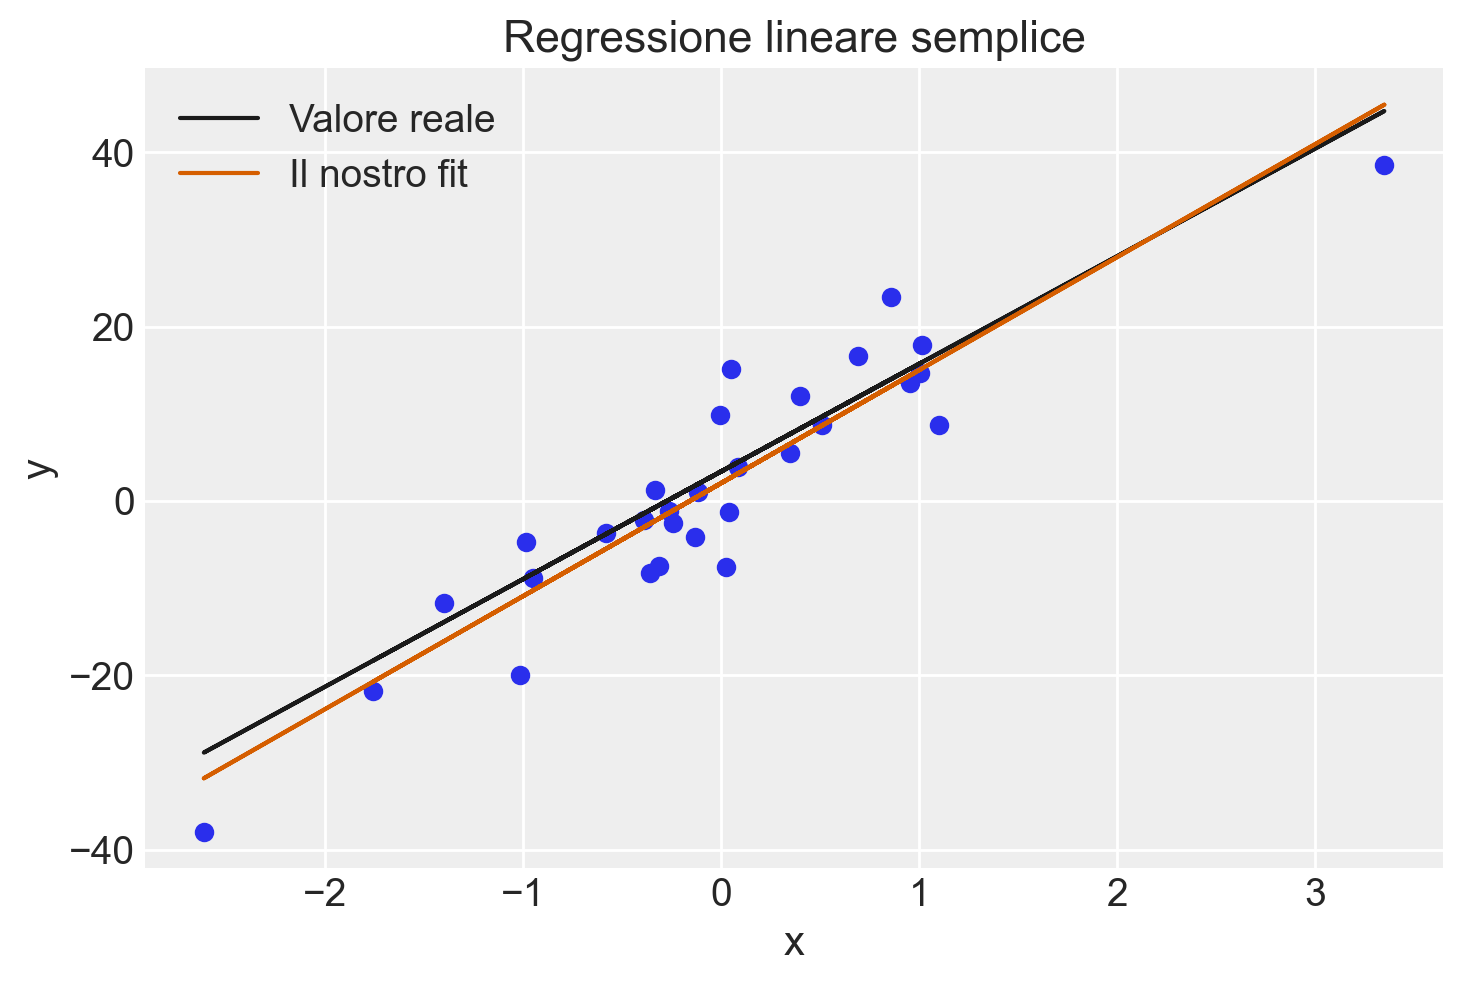

In [28]:
# Grafico dei dati
fig, ax = plt.subplots()
ax.scatter(data, y)  # Tracciamento dei dati
ax.set(xlabel="x", ylabel="y", title="Regressione lineare semplice")

# Traccia la linea vera
b_0, b_1 = b
ax.plot(data, b_0 + (b_1 * data), color="k", label="Valore reale")

# Traccia il nostro fit
ax.plot(data, y_hat, color="r", label="Il nostro fit")
_ = ax.legend()

Replichiamo i risultati usando `pingouin`:

In [40]:
y = np.array(y).flatten()
lm = pg.linear_regression(x, y)
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.06,1.02,2.02,0.05,0.86,0.86,-0.03,4.16
1,x2,12.97,0.98,13.29,0.00,0.86,0.86,10.97,14.97


## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [1]:
%load_ext watermark
%watermark -n -u -v -iv -w -m 

Last updated: Tue Aug 27 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

Watermark: 2.4.3

